<a href="https://colab.research.google.com/github/fsoaresg/Desafio_Telecom_X_Latam/blob/main/Telecom_X_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge Telecom X: análisis de evasión de clientes**

---



He sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Mi desafío es recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de mi análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

---
## ***1. Extracción***
---

### *1.1 Cargar los datos desde la API (JSON)*



In [106]:
# Importar las librerías necesarias

import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from scipy.stats import gaussian_kde

# Cargar los datos desde la API (JSON)

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)

data = response.json()

# Convertir los datos a un DataFrame de Pandas

df = pd.DataFrame(data)

# Verificar que la carga fue correcta

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### *2.1 Extraer los datos agrupados*



In [107]:
# Extraer los datos agrupados json (normalización de datos o aplanar el archivo)

df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


### *3.1 Análisis de la Estructura de los Datos*



🔍 **Análisis de la Estructura de los Datos**
Los datos están organizados en un formato jerárquico (diccionario dentro de diccionario), conteniendo la siguiente información:

1. **Identificación del Cliente** - `'customerID'`: Identificador único del cliente.
* `'Churn'`: Indica si el cliente canceló el servicio (`Yes` o `No`).


2. **Información del Cliente** (`'customer'`)
* `'gender'`: Género del cliente (`Male` o `Female`).
* `'SeniorCitizen'`: Indica si el cliente es una persona mayor (0 = No, 1 = Sí).
* `'Partner'`: Si el cliente tiene pareja.
* `'Dependents'`: Si el cliente tiene dependientes.
* `'tenure'`: Tiempo de permanencia como cliente (en meses).


3. **Servicios de Telefonía** (`'phone'`)
* `'PhoneService'`: Indica si el cliente posee servicio de teléfono (`Yes` o `No`).
* `'MultipleLines'`: Si posee múltiples líneas telefónicas.


4. **Servicios de Internet** (`'internet'`)
* Tipo de servicio de internet contratado (`DSL`, `Fiber optic`, `No`).
* Servicios adicionales (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`).


5. **Información de la Cuenta** (`'account'`)
* `'Contract'`: Tipo de contrato (`Month-to-month`, `One year`, `Two year`).
* `'PaperlessBilling'`: Si el cliente recibe facturas electrónicas.
* `'PaymentMethod'`: Método de pago (`Bank transfer`, `Credit card`, `Electronic check`, `Mailed check`).
* `'Charges'`:
* `'Monthly'`: Valor mensual cobrado.
* `'Total'`: Valor total pagado por el cliente.

---
## ***2. Transformación***
---

### *2.1 Explorar la estructura general del dataset*



In [108]:
# Explorar la estructura general del dataset

df.shape

(7267, 21)

### *2.2 Revisar columnas, tipos de datos y valores nulos*



In [109]:
# Revisar columnas, tipos de datos y valores nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### *2.3 Verificar valores únicos*



In [110]:
# Verificar valores únicos

for col in df.columns:
  print(f'{col}: {df[col].nunique()}')
  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

customerID: 7267
Churn: 3
['No' 'Yes' '']
--------------------------------------------------
customer.gender: 2
['Female' 'Male']
--------------------------------------------------
customer.SeniorCitizen: 2
[0 1]
--------------------------------------------------
customer.Partner: 2
['Yes' 'No']
--------------------------------------------------
customer.Dependents: 2
['Yes' 'No']
--------------------------------------------------
customer.tenure: 73
phone.PhoneService: 2
['Yes' 'No']
--------------------------------------------------
phone.MultipleLines: 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
internet.InternetService: 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
internet.OnlineSecurity: 3
['No' 'Yes' 'No internet service']
--------------------------------------------------
internet.OnlineBackup: 3
['Yes' 'No' 'No internet service']
--------------------------------------------------
internet.DeviceProtecti

### *2.4 Verificar valores duplicados*



In [111]:
# Verificar valores duplicados

print(f"\n\033[1m\033[3mNúmero de duplicados: {df.duplicated().sum()}\033[0m\n")


Número de duplicados: 0



### *2.5 Verificar valores nulos o faltantes*



In [112]:
# Verificar valores nulos o faltantes

print("\n\033[1m\033[3mNumero de Nulos \033[0m\n", df.isnull().sum())


Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


### *2.6 Verificar valores vacíos o en blanco*



In [113]:
# Verificar valores vacíos o en blanco

df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


### *2.7 Eliminar filas donde la columna 'Churn' contiene solo espacios vacíos o en blanco*



In [114]:
# Eliminar las filas con valores vacíos o en blanco de la columna Churn

df = df[df['Churn'].astype(str).str.strip() != '']

print(f"\n\033[1m\033[3mNúmero de filas después de eliminar las vacías en 'Churn': {len(df)}\033[0m\n")


Número de filas después de eliminar las vacías en 'Churn': 7043



In [115]:
# Verificar valores vacíos o en blanco

df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


### *2.8 Eliminar filas donde la columna 'account.Charges.Total' contiene solo espacios vacíos o en blanco*



In [116]:
# Eliminar las filas con valores vacíos o en blanco de la columna Churn

df = df[df['account.Charges.Total'].astype(str).str.strip() != '']

print(f"\n\033[1m\033[3mNúmero de filas después de eliminar las vacías en 'account.Charges.Total': {len(df)}\033[0m\n")


Número de filas después de eliminar las vacías en 'account.Charges.Total': 7032



In [117]:
# Verificar valores vacíos o en blanco

df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


### *2.9 Cambiar la columna "account.Charges.Total" a Float*



In [118]:
# Cambiar la columna "account.Charges.Total" a Float

df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Verificar si se cambio la columna "account.Charges.Total" a Float

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

In [119]:
# Verificar valores nulos o faltantes en la columna "account.Charges.Total"

print("\n\033[1m\033[3mNumero de Nulos \033[0m\n", df.isnull().sum())


Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


### *2.10 Crear la columna "Cuentas_Diarias"*



In [120]:
'''Opcional'''
# Crear la columna "Cuentas_Diarias". Utilizar la facturación mensual para calcular el valor diario,
# proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

df['cuentas_diarias'] = df['account.Charges.Monthly'] / 30
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


### *2.11 Estandarizar y transformar los datos (traducir o renombrar columnas y datos)*



In [121]:
# Traducir o renombrar columnas y datos

# Diccionario con los nuevos nombres de las columnas.

columnas = {
    'customerID': 'id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'tiene +60',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'valor_mensual',
    'account.Charges.Total': 'total_cobrado'
}

df = df.rename(columns= columnas)

df

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [122]:
# Renombrar datos

df['Churn'] = df['Churn'].replace({'No': 'No', 'Yes': 'Sí'})

df['genero'] = df['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})

df['posee_pareja'] = df['posee_pareja'].replace({'Yes': 'Sí', 'No': 'No'})

df['posee_dependientes'] = df['posee_dependientes'].replace({'Yes': 'Sí', 'No': 'No'})

df['servicio_telefono'] = df['servicio_telefono'].replace({'Yes': 'Sí', 'No': 'No'})

df['multiples_lineas'] = df['multiples_lineas'].replace({'No': 'No', 'Yes': 'Sí', 'No phone service': 'Sin servicio de teléfono'})

df['tipo_internet'] = df['tipo_internet'].replace({'No': 'No'})

df['tipo_contrato'] = df['tipo_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'})

df['factura_digital'] = df['factura_digital'].replace({'Yes': 'Sí', 'No': 'No'})

df.head()

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Yes,Yes,No,Anual,Sí,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Yes,Mensual,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Yes,No,No,No,Mensual,Sí,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Yes,No,Yes,Yes,Mensual,Sí,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Yes,Yes,No,Mensual,Sí,Mailed check,83.9,267.40,2.796667


In [123]:
# Traducir datos

columnas_a_traducir = ['seguridad_online', 'backup_online', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']

mapeo = {'No': 'No', 'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'}

for col in columnas_a_traducir:
    df[col] = df[col].replace(mapeo)

df.head()

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Sí,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Mensual,Sí,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Mensual,Sí,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Mensual,Sí,Mailed check,83.9,267.40,2.796667


In [124]:
# Renombrar datos de las columnas "metodo_pago" y "tipo_internet" respectivamente

df['metodo_pago'] = df['metodo_pago'].replace({
    'Mailed check': 'Cheque enviado por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
})

df['tipo_internet'] = df['tipo_internet'].replace({
    'Fiber optic': 'Fibra óptica',
    'DSL': 'Banda ancha',
    'No': 'Sin Internet'
})

df.head()

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,Banda ancha,...,No,Sí,Sí,No,Anual,Sí,Cheque enviado por correo,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,Banda ancha,...,No,No,No,Sí,Mensual,No,Cheque enviado por correo,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque enviado por correo,83.9,267.40,2.796667


In [125]:
# Revisar los valores únicos del Data Frame identificar columnas con valores textuales
# como "Sí" y "No" para estandarizalos a valores binarios (1 y 0)

for col in df:
    print(col, df[col].unique())

id ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn ['No' 'Sí']
genero ['Femenino' 'Masculino']
tiene +60 [0 1]
posee_pareja ['Sí' 'No']
posee_dependientes ['Sí' 'No']
tiempo_contrato [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
servicio_telefono ['Sí' 'No']
multiples_lineas ['No' 'Sí' 'Sin servicio de teléfono']
tipo_internet ['Banda ancha' 'Fibra óptica' 'Sin Internet']
seguridad_online ['No' 'Sí' 'Sin servicio de internet']
backup_online ['Sí' 'No' 'Sin servicio de internet']
proteccion_dispositivo ['No' 'Sí' 'Sin servicio de internet']
soporte_tecnico ['Sí' 'No' 'Sin servicio de internet']
streaming_tv ['Sí' 'No' 'Sin servicio de internet']
streaming_peliculas ['No' 'Sí' 'Sin servicio de internet']
tipo_contrato ['Anual' 'Mensual' 'Bienal']
factura_digital ['Sí' 'No']


In [126]:
# Estandarizar valores textuales como "Sí" y "No" en valores binarios (Sí / No → 1 / 0)

columnas_binarias = [
    'Churn',
    'posee_pareja',
    'posee_dependientes',
    'servicio_telefono',
    'factura_digital'
    ]

for col in columnas_binarias:
    df[col] = df[col].str.strip().str.lower()  # limpiar y pasar a minúscula
    df[col] = df[col].map({'sí': 1, 'no': 0})

In [127]:
# Revisar los valores únicos para verificar el cambio

for col in df:
    print(col, df[col].unique())

id ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn [0 1]
genero ['Femenino' 'Masculino']
tiene +60 [0 1]
posee_pareja [1 0]
posee_dependientes [1 0]
tiempo_contrato [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
servicio_telefono [1 0]
multiples_lineas ['No' 'Sí' 'Sin servicio de teléfono']
tipo_internet ['Banda ancha' 'Fibra óptica' 'Sin Internet']
seguridad_online ['No' 'Sí' 'Sin servicio de internet']
backup_online ['Sí' 'No' 'Sin servicio de internet']
proteccion_dispositivo ['No' 'Sí' 'Sin servicio de internet']
soporte_tecnico ['Sí' 'No' 'Sin servicio de internet']
streaming_tv ['Sí' 'No' 'Sin servicio de internet']
streaming_peliculas ['No' 'Sí' 'Sin servicio de internet']
tipo_contrato ['Anual' 'Mensual' 'Bienal']
factura_digital [1 0]
metodo_pago ['Cheque enviado p

In [128]:
df

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensual,total_cobrado,cuentas_diarias
0,0002-ORFBO,0,Femenino,0,1,1,9,1,No,Banda ancha,...,No,Sí,Sí,No,Anual,1,Cheque enviado por correo,65.60,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Sí,Banda ancha,...,No,No,No,Sí,Mensual,0,Cheque enviado por correo,59.90,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,No,Fibra óptica,...,Sí,No,No,No,Mensual,1,Cheque electrónico,73.90,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,1,Cheque electrónico,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,1,Cheque enviado por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Femenino,0,0,0,13,1,No,Banda ancha,...,No,Sí,No,No,Anual,0,Cheque enviado por correo,55.15,742.90,1.838333
7263,9992-RRAMN,1,Masculino,0,1,0,22,1,Sí,Fibra óptica,...,No,No,No,Sí,Mensual,1,Cheque electrónico,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Masculino,0,0,0,2,1,No,Banda ancha,...,No,No,No,No,Mensual,1,Cheque enviado por correo,50.30,92.75,1.676667
7265,9993-LHIEB,0,Masculino,0,1,1,67,1,No,Banda ancha,...,Sí,Sí,No,Sí,Bienal,0,Cheque enviado por correo,67.85,4627.65,2.261667


---
## ***3. Carga y análisis***
---

### *3.1 Realizar el análisis descriptivo de los datos, calcular métricas como media, mediana, desviación estándar*



In [129]:
# Realizar el análisis descriptivo de los datos, calcular métricas como media, mediana, desviación estándar

df_estadisticas = df[['tiempo_contrato', 'valor_mensual', 'total_cobrado', 'cuentas_diarias']].describe()

df_estadisticas

,tiempo_contrato,valor_mensual,total_cobrado,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940
std,24.545260,30.085974,2266.771362,1.002866
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.587500,401.450000,1.186250
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995417
max,72.000000,118.750000,8684.800000,3.958333


### *3.2 Estadísticos descriptivos principales*



In [130]:
# Estadísticos descriptivos principales

titulo = "Estadísticos descriptivos principales"

print("\n\033[1m" + titulo.center(70) + "\n\033[0m")

tabla = (df_estadisticas.loc[['mean', '50%', 'std']].round(2))

# Cambiar nombres al español

tabla.index = ['Media', 'Mediana', 'Desviación estándar']

print(tabla)


                Estadísticos descriptivos principales                 

                     tiempo_contrato  valor_mensual  total_cobrado  \
Media                          32.42          64.80        2283.30   
Mediana                        29.00          70.35        1397.48   
Desviación estándar            24.55          30.09        2266.77   

                     cuentas_diarias  
Media                           2.16  
Mediana                         2.34  
Desviación estándar             1.00  


In [131]:
# Calcular la moda

moda_mes = df['valor_mensual'].mode()[0]
moda_ano = df['total_cobrado'].mode()[0]
moda_t = df['tiempo_contrato'].mode()[0]
moda_d = df['cuentas_diarias'].mode()[0]

frec_mes = (df['valor_mensual'] == moda_mes).sum()
frec_ano = (df['total_cobrado'] == moda_ano).sum()
frec_t = (df['tiempo_contrato'] == moda_t).sum()
frec_d = (df['cuentas_diarias'] == moda_d).sum()

print(f'\n\033[1m\033[3mLa moda del pago mensual es: {moda_mes:.2f} y la frecuencia es:{frec_mes}\033[0m\n')
print(f'\033[1m\033[3mLa moda del total cobrado es: {moda_ano:.2f} y la frecuencia es:{frec_ano}\033[0m\n')
print(f'\033[1m\033[3mLa moda del tiempo de contrato es: {moda_t:.2f} y la frecuencia es:{frec_t}\033[0m\n')
print(f'\033[1m\033[3mLa moda de las cuentas diarias es: {moda_d:.2f} y la frecuencia es:{frec_d}\033[0m\n')


La moda del pago mensual es: 20.05 y la frecuencia es:61

La moda del total cobrado es: 20.20 y la frecuencia es:11

La moda del tiempo de contrato es: 1.00 y la frecuencia es:613

La moda de las cuentas diarias es: 0.67 y la frecuencia es:61



### *3.3 Gráfico del Análisis Estadístico de las Variables Numéricas*


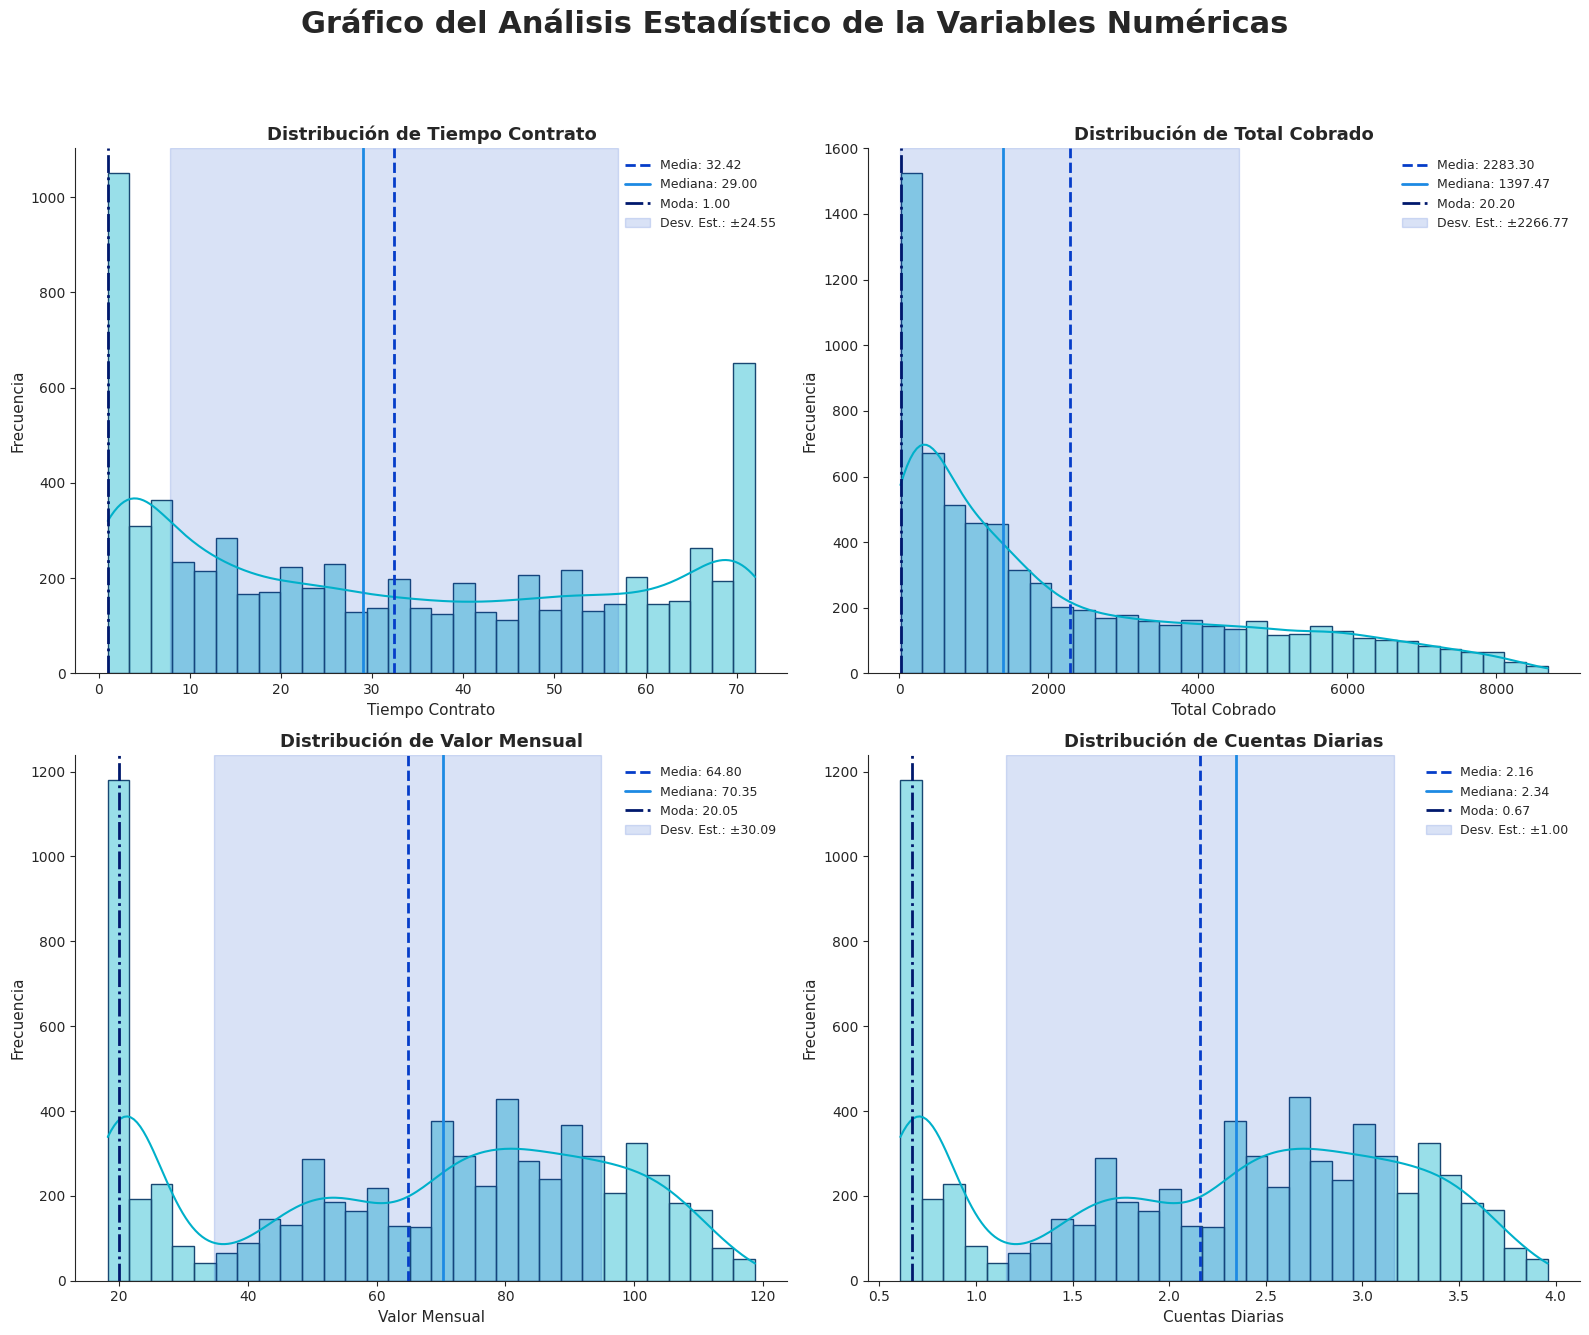

In [132]:
# Gráfico del Análisis Estadístico de las Variables Numéricas

# Configuración de estilo global
sns.set_style("ticks")
variables_num = ['tiempo_contrato', 'total_cobrado', 'valor_mensual', 'cuentas_diarias']

# Crear la cuadrícula de 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))
axes = axes.flatten()

# Definir colores
color_base = "#00B0CA"
color_borde = "#184772"
color_m_std = '#053DC9'
color_mediana = '#1D8AE3'
color_moda = '#00186D'

for i, col in enumerate(variables_num):
    # Cálculo de métricas específicas
    media = df[col].mean()
    mediana = df[col].median()
    moda = df[col].mode()[0]
    std = df[col].std(ddof=1)

    # Histograma con KDE
    sns.histplot(df[col], bins=30, kde=True, color=color_base,
                 edgecolor=color_borde, alpha=0.4, ax=axes[i])

    # Líneas de Tendencia Central
    axes[i].axvline(media, color=color_m_std, linestyle='--', linewidth=2,
                    label=f'Media: {media:.2f}')
    axes[i].axvline(mediana, color=color_mediana, linestyle='-', linewidth=2,
                    label=f'Mediana: {mediana:.2f}')
    axes[i].axvline(moda, color=color_moda, linestyle='-.', linewidth=2,
                    label=f'Moda: {moda:.2f}')

    # Sombreado de Desviación Estándar (axvspan)
    axes[i].axvspan(media - std, media + std, color=color_m_std, alpha=0.15,
                    label=f'Desv. Est.: ±{std:.2f}')

    # Estética por Subplot
    axes[i].set_title(f"Distribución de {col.replace('_', ' ').title()}",
                      fontsize=13, fontweight="bold")
    axes[i].set_xlabel(col.replace('_', ' ').title(), fontsize=11)
    axes[i].set_ylabel("Frecuencia", fontsize=11)
    axes[i].legend(fontsize=9, loc='upper right', frameon=False)

    # Limpieza de bordes
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

# Título General
fig.suptitle('Gráfico del Análisis Estadístico de la Variables Numéricas',
             fontsize=22, fontweight='bold', y=0.98)

# Ajuste de diseño para evitar solapamientos
plt.tight_layout(rect=[0, 0.03, 1, 0.94])
plt.show()

### *3.4 Distribución de la Evasión (Churn) de los Clientes*


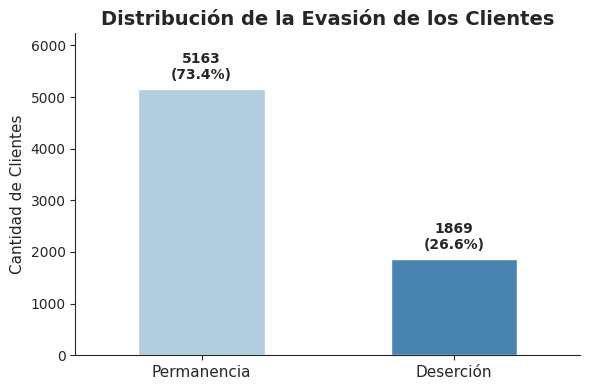

In [133]:
# Recuento Global de la Evasión de los Clientes

sns.set_style("ticks")

plt.figure(figsize=(6, 4))

paleta = sns.color_palette("Blues", 2)

ax = sns.countplot(
    x='Churn',
    hue='Churn',
    data=df,
    width= 0.5,
    palette=paleta,
    legend=False
)

# Cambiar nombres de las etiquetas
ax.set_xticks([0, 1])
ax.set_xticklabels(['Permanencia', 'Deserción'], fontsize=11)

# Agregar valores
total = len(df)
for p in ax.patches:
    height = p.get_height()
    porcentaje = height / total * 100
    ax.annotate(f'{int(height)}\n({porcentaje:.1f}%)',
                (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom',
                fontsize=10,
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribución de la Evasión de los Clientes',
          fontsize=14,
          fontweight='bold')

plt.xlabel('')
plt.ylabel('Cantidad de Clientes', fontsize=11)

sns.despine() # Eliminar línea superior y derecha del grafico
plt.ylim(0, ax.get_ylim()[1] * 1.15) # Espacio extra para las etiquetas
plt.tight_layout()
plt.show()

### *3.5 Recuento de la evasión por variables categóricas*

In [134]:
# Recuento de la evasión por variables categóricas

# Extraer colores exactos de Seaborn ('Blues')
# Convertir RGB (0-1) a formato Hexadecimal o String para Plotly
blues_palette = sns.color_palette("Blues", 6).as_hex()
color_permanencia = blues_palette[2]
color_desercion = blues_palette[4]

variables_cat = ['tipo_contrato', 'metodo_pago', 'tipo_internet', 'genero']

# Crear la cuadrícula (2 filas, 2 columnas)
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[f"<b>Recuento por {col.replace('_', ' ').title()}</b>" for col in variables_cat],
    vertical_spacing=0.15,
    horizontal_spacing=0.1
)

for i, col in enumerate(variables_cat):
    row = (i // 2) + 1
    col_idx = (i % 2) + 1

    # Agrupar y calcular los porcentajes
    counts = df.groupby([col, 'Churn']).size().reset_index(name='cantidad')
    total_col = counts.groupby(col)['cantidad'].transform('sum')
    counts['porcentaje'] = (counts['cantidad'] / total_col * 100).round(1)

    for j, status in enumerate([0, 1]):
        subset = counts[counts['Churn'] == status]
        label = "Permanencia" if status == 0 else "Deserción"
        color = color_permanencia if status == 0 else color_desercion

        fig.add_trace(
            go.Bar(
                x=subset[col],
                y=subset['cantidad'],
                name=label,
                legendgroup=label,
                marker_color=color,
                # Usar textposition 'auto' y cliponaxis=False para evitar que se solapen
                text=subset.apply(lambda r: f"{int(r['cantidad'])}<br>({r['porcentaje']}%)", axis=1),
                textposition='outside',
                cliponaxis=False,
                showlegend=(i == 0),
                hovertemplate=f"<b>{label}</b><br>Categoría: %{{x}}<br>Cantidad: %{{y}}<extra></extra>"
            ),
            row=row, col=col_idx
        )

# Ajustes de Layout
fig.update_layout(
    title_text="<b>Recuento de la evasión por variables categóricas</b>",
    title_x=0.5,
    title_font=dict(size=20),
    barmode='group',
    height=1000,
    width=1100,
    template="simple_white",
    margin=dict(t=150, b=50, l=50, r=50),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.04,
        xanchor="center",
        x=0.5,
        groupclick="togglegroup"
    )
)

# Ajustar ejes para evitar cortes en las etiquetas de las barras
fig.update_yaxes(
    title_text="Cantidad de Clientes",
    title_font=dict(size=11),
    tickfont=dict(size=10),
    range=[0, df['id'].count() / 1.5] # Escalado dinámico para que el texto 'outside' no choque con títulos
)

fig.update_xaxes(tickangle=30, tickfont=dict(size=10))

fig.show()

#Generar grafico en html para visualización interactiva

plot_div = fig.to_html(include_plotlyjs='cdn', full_html=False)

html_content = f"""
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <title>Recuento de la evasión por variables categóricas</title>

    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #f4f6f9;
            margin: 0;
            padding: 40px;
        }}

        .btn {{
            position: fixed;
            top: 20px;
            left: 20px;
            padding: 10px 18px;
            background-color: #2563eb;
            color: white;
            text-decoration: none;
            border-radius: 8px;
            font-size: 14px;
            font-weight: 600;
            box-shadow: 0 4px 8px rgba(0,0,0,0.15);
            z-index: 9999;
        }}

        .btn:hover {{
            background-color: #1d4ed8;
        }}

        .container {{
            margin-top: 60px;
        }}
    </style>
</head>

<body>

<a href="index.html" class="btn">⬅ Volver al Dashboard</a>

<div class="container">
{plot_div}
</div>

</body>
</html>
"""

with open("Recuento de la evasión por variables categóricas.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("\n¡Gráfico exportado como 'Recuento de la evasión por variables categóricas.html'!\n")


¡Gráfico exportado como 'Recuento de la evasión por variables categóricas.html'!



### *3.6 Tasa de Deserción por Perfil y Género*

In [135]:
# Tasa de Deserción por Perfil y Género

# Extraer colores exactos de Seaborn ('Blues')
# Convertir RGB (0-1) a formato Hexadecimal o String para Plotly
blues_palette = sns.color_palette("Blues_d", 6).as_hex()
color_senior = blues_palette[5]
color_pareja = blues_palette[4]
color_depen = blues_palette[3]

# Función para calcular la tasa de deserción (%) por segmento y género
def obtener_tasa(filtro_col, nombre_cat):
    # Total de personas en ese segmento (Seniors, con Pareja, etc) por género
    totales = df[df[filtro_col] == 1].groupby('genero').size()
    # Cuántos de esos se fueron (Churn == 1)
    evadidos = df[(df[filtro_col] == 1) & (df['Churn'] == 1)].groupby('genero').size()

    resumen = (evadidos / totales * 100).reset_index(name='Porcentaje')
    resumen['Categoría'] = nombre_cat
    return resumen

# Construir el DataFrame con las TASA (%)
cat_senior = obtener_tasa('tiene +60', 'Deserción Senior (+60)')
cat_pareja = obtener_tasa('posee_pareja', 'Deserción con Pareja')
cat_depen  = obtener_tasa('posee_dependientes', 'Deserción con Dependientes')

df_tasas = pd.concat([cat_senior, cat_pareja, cat_depen])

# Ordenar de mayor a menor porcentaje (Izquierda a Derecha)
df_tasas = df_tasas.sort_values(by='Porcentaje', ascending=False)

# Crear el gráfico interactivo
fig = px.bar(
    df_tasas,
    x='genero',
    y='Porcentaje',
    color='Categoría',
    barmode='group',
    text='Porcentaje',
    title='<b>Tasa de Deserción por Perfil y Género</b>',
    labels={'genero': 'Género', 'Porcentaje': 'Tasa de Deserción (%)'},
    color_discrete_sequence=[color_senior, color_pareja, color_depen], # Del más oscuro al más claro
    template='simple_white'
)

# Ajustes finales
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20),
    yaxis_range=[0, 50],
    legend=dict(
        title="Perfil",
        orientation="h",
        yanchor="bottom", y=1.02,
        xanchor="center", x=0.5
    )
)

fig.update_traces(
    texttemplate='%{text:.1f}%',
    textposition='outside',
    cliponaxis=False
)

fig.show()

#Generar grafico en html para visualización interactiva

plot_div = fig.to_html(include_plotlyjs='cdn', full_html=False)

html_content = f"""
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <title>Tasa de Deserción por Perfil y Género</title>

    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #f4f6f9;
            margin: 0;
            padding: 40px;
        }}

        .btn {{
            position: fixed;
            top: 20px;
            left: 20px;
            padding: 10px 18px;
            background-color: #2563eb;
            color: white;
            text-decoration: none;
            border-radius: 8px;
            font-size: 14px;
            font-weight: 600;
            box-shadow: 0 4px 8px rgba(0,0,0,0.15);
            z-index: 9999;
        }}

        .btn:hover {{
            background-color: #1d4ed8;
        }}

        .container {{
            margin-top: 60px;
        }}
    </style>
</head>

<body>

<a href="index.html" class="btn">⬅ Volver al Dashboard</a>

<div class="container">
{plot_div}
</div>

</body>
</html>
"""

with open("Tasa de Deserción por Perfil y Género.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("\n¡Gráfico exportado como 'Tasa de Deserción por Perfil y Género.html'!\n")


¡Gráfico exportado como 'Tasa de Deserción por Perfil y Género.html'!



### *3.7 Recuento de la evasión por variables numéricas*

In [136]:
# Recuento de la evasión por variables numéricas

# Extraer colores exactos de Seaborn ('Blues')
# Convertir RGB (0-1) a formato Hexadecimal o String para Plotly
blues_palette = sns.color_palette("Blues", 6).as_hex()
color_permanencia = blues_palette[2]
color_desercion = blues_palette[4]

variables_num = ['tiempo_contrato', 'total_cobrado', 'valor_mensual', 'cuentas_diarias']

# Calculo de Cohen d
def cohens_d(x0, x1):
    return (np.mean(x1) - np.mean(x0)) / np.sqrt(
        (np.var(x0) + np.var(x1)) / 2
    )

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[f"<b>Recuento por {v.replace('_', ' ').title()}</b>" for v in variables_num],
    horizontal_spacing=0.12,
    vertical_spacing=0.18
)

row = 1
col = 1

for var in variables_num:

    x0 = df[df['Churn']==0][var]
    x1 = df[df['Churn']==1][var]

    mean0 = x0.mean()
    mean1 = x1.mean()
    d = cohens_d(x0, x1)

    kde0 = gaussian_kde(x0)
    kde1 = gaussian_kde(x1)

    x_range = np.linspace(df[var].min(), df[var].max(), 200)

    # Curvas
    fig.add_trace(
        go.Scatter(
            x=x_range,
            y=kde0(x_range),
            fill='tozeroy',
            name='Permanencia',
            legendgroup='Permanencia',
            line=dict(color=color_permanencia),
            opacity=0.6,
            showlegend=(row==1 and col==1)
        ),
        row=row, col=col
    )

    fig.add_trace(
        go.Scatter(
            x=x_range,
            y=kde1(x_range),
            fill='tozeroy',
            name='Deserción',
            legendgroup='Deserción',
            line=dict(color=color_desercion),
            opacity=0.8,
            showlegend=(row==1 and col==1)
        ),
        row=row, col=col
    )

    # Líneas de media
    fig.add_vline(x=mean0, line_dash="dash", line_color=color_permanencia, row=row, col=col)
    fig.add_vline(x=mean1, line_dash="dash", line_color=color_desercion, row=row, col=col)

    # Anotaciones medias
    fig.add_annotation(
    x=mean0,
    y=max(kde0(x_range))*0.9,
    text=f"<b>Media Perm: {mean0:.2f}</b>",
    showarrow=False,
    font=dict(color=color_permanencia, size=11),
    row=row, col=col
    )

    fig.add_annotation(
    x=mean1,
    y=max(kde1(x_range))*0.75,
    text=f"<b>Media Deserc: {mean1:.2f}</b>",
    showarrow=False,
     font=dict(color=color_desercion, size=11),
    row=row, col=col
    )

    # Añadir Cohen d al subtítulo
    fig.layout.annotations[(row-1)*2 + (col-1)].text += f"<br><sup><b>Cohen d = {d:.2f}<b></sup>"

    # Etiquetas ejes
    fig.update_xaxes(title_text=var.replace("_"," ").title(), row=row, col=col)
    fig.update_yaxes(title_text="Densidad", row=row, col=col)

    if col == 2:
        row += 1
        col = 1
    else:
        col += 1

# Layout general
fig.update_layout(
    height=1000,
    width=1100,
    title={
        'text': "<b>Recuento de la evasión por variables numéricas<b>",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=20)
    },
    template="plotly_white",
    margin=dict(t=150, b=50, l=50, r=50),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.04,
        xanchor="center",
        x=0.5,
        groupclick="togglegroup"
    )
)

fig.show()

#Generar grafico en html para visualización interactiva

plot_div = fig.to_html(include_plotlyjs='cdn', full_html=False)

html_content = f"""
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <title>Recuento de la evasión por variables numéricas</title>

    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #f4f6f9;
            margin: 0;
            padding: 40px;
        }}

        .btn {{
            position: fixed;
            top: 20px;
            left: 20px;
            padding: 10px 18px;
            background-color: #2563eb;
            color: white;
            text-decoration: none;
            border-radius: 8px;
            font-size: 14px;
            font-weight: 600;
            box-shadow: 0 4px 8px rgba(0,0,0,0.15);
            z-index: 9999;
        }}

        .btn:hover {{
            background-color: #1d4ed8;
        }}

        .container {{
            margin-top: 60px;
        }}
    </style>
</head>

<body>

<a href="index.html" class="btn">⬅ Volver al Dashboard</a>

<div class="container">
{plot_div}
</div>

</body>
</html>
"""

with open("Recuento de la evasión por variables numéricas.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("\n¡Gráfico exportado como 'Recuento de la evasión por variables numéricas.html'!\n")


¡Gráfico exportado como 'Recuento de la evasión por variables numéricas.html'!



### *3.8 Comparativa de Deserción: Ciclo de Vida por Contrato*

In [137]:
# Comparativa de Deserción: Ciclo de Vida por Contrato

# Calcular Tasa de Deserción (%) por Mes y Contrato
df_lineas = df.groupby(['tipo_contrato', 'tiempo_contrato'])['Churn'].mean().reset_index()
df_lineas['Churn_Pct'] = (df_lineas['Churn'] * 100).round(2)

# Extraer colores exactos de Seaborn ('Blues')
# Convertir RGB (0-1) a formato Hexadecimal o String para Plotly
blues = sns.color_palette("Blues_d", 6).as_hex()
colores_map = {
    'Mensual': blues[5],
    'Anual': blues[3],
    'Bienal': blues[0]
}

# Crear el gráfico de líneas
fig = go.Figure()

for contrato in ['Mensual', 'Anual', 'Bienal']:
    subset = df_lineas[df_lineas['tipo_contrato'] == contrato]

    fig.add_trace(
        go.Scatter(
            x=subset['tiempo_contrato'],
            y=subset['Churn_Pct'],
            mode='lines+markers',
            name=f'Contrato {contrato}',
            line=dict(color=colores_map[contrato], width=3),
            marker=dict(size=5),
            hovertemplate='<b>' + contrato + '</b><br>Mes: %{x}<br>Tasa: %{y:.1f}%<extra></extra>'
        )
    )

# Ajustar el Diseño
fig.update_layout(
    title_text="<b>Comparativa de Deserción: Ciclo de Vida por Contrato</b>",
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=20),
    xaxis_title="Meses de Permanencia",
    yaxis_title="Tasa de Deserción (%)",
    template="simple_white",
    height=600,
    width=1000,
    hovermode="x unified", # Muestra los datos de los 3 tipos de contrato al pasar por un mes
    margin=dict(t=150, b=80, l=80, r=50),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        title_text=""
    )
)

# Ajustar Ejes
fig.update_yaxes(
    range=[-2, 100],
    dtick=20,
    ticksuffix="%",
    gridcolor='rgba(0,0,0,0.05)', # Cuadrícula muy sutil para facilitar la lectura
    showgrid=True
)

fig.update_xaxes(
    dtick=12,
    showgrid=True,
    gridcolor='rgba(0,0,0,0.05)'
)

fig.show()

#Generar grafico en html para visualización interactiva

plot_div = fig.to_html(include_plotlyjs='cdn', full_html=False)

html_content = f"""
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <title>Comparativa de Deserción: Ciclo de Vida por Contrato</title>

    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #f4f6f9;
            margin: 0;
            padding: 40px;
        }}

        .btn {{
            position: fixed;
            top: 20px;
            left: 20px;
            padding: 10px 18px;
            background-color: #2563eb;
            color: white;
            text-decoration: none;
            border-radius: 8px;
            font-size: 14px;
            font-weight: 600;
            box-shadow: 0 4px 8px rgba(0,0,0,0.15);
            z-index: 9999;
        }}

        .btn:hover {{
            background-color: #1d4ed8;
        }}

        .container {{
            margin-top: 60px;
        }}
    </style>
</head>

<body>

<a href="index.html" class="btn">⬅ Volver al Dashboard</a>

<div class="container">
{plot_div}
</div>

</body>
</html>
"""

with open("Comparativa de Deserción: Ciclo de Vida por Contrato.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("\n¡Gráfico exportado como 'Comparativa de Deserción: Ciclo de Vida por Contrato.html'!\n")


¡Gráfico exportado como 'Comparativa de Deserción: Ciclo de Vida por Contrato.html'!



### *3.9 Análisis de correlación entre variables*

In [138]:
# Análisis de correlación entre variables

# Copia del dataset
df_corr = df.copy()

# Preparar DataFrame para correlación
df_corr = df_corr.drop(columns=['id']).copy()

# Aplicar One-Hot Encoding correctamente (Evita la multicolinealidad)
# Convertir categóricas a numéricas eliminando la primera columna de cada grupo
df_procesado = pd.get_dummies(df_corr, drop_first=True)

# Calcular matriz de correlación (Pearson por defecto)
corr_matrix = df_procesado.corr()

fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='RdBu_r',
    zmin=-1,
    zmax=1,
    colorbar=dict(title="Correlación"),
    hovertemplate=
        'Variable X: %{x}<br>'+
        'Variable Y: %{y}<br>'+
        'Correlación: %{z:.3f}<extra></extra>'
))

fig.update_layout(
    title={
        'text': "<br>Matriz de Correlación entre Variables<br>",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=20)
    },
    template="simple_white",
    width=1000,
    height=1000
)

fig.show()

#Generar grafico en html para visualización interactiva

plot_div = fig.to_html(include_plotlyjs='cdn', full_html=False)

html_content = f"""
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <title>Análisis de correlación entre variables</title>

    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #f4f6f9;
            margin: 0;
            padding: 40px;
        }}

        .btn {{
            position: fixed;
            top: 20px;
            left: 20px;
            padding: 10px 18px;
            background-color: #2563eb;
            color: white;
            text-decoration: none;
            border-radius: 8px;
            font-size: 14px;
            font-weight: 600;
            box-shadow: 0 4px 8px rgba(0,0,0,0.15);
            z-index: 9999;
        }}

        .btn:hover {{
            background-color: #1d4ed8;
        }}

        .container {{
            margin-top: 60px;
        }}
    </style>
</head>

<body>

<a href="index.html" class="btn">⬅ Volver al Dashboard</a>

<div class="container">
{plot_div}
</div>

</body>
</html>
"""

with open("Análisis de correlación entre variables.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("\n¡Gráfico exportado como 'Análisis de correlación entre variables.html'!")


¡Gráfico exportado como 'Análisis de correlación entre variables.html'!


---
## **4. Informe final***
---

### *4.1 Introducción*

El objetivo de este análisis es identificar los factores críticos que influyen en la pérdida de clientes (Churn) de la empresa Telecom X. La evasión de clientes es uno de los mayores desafíos para las empresas de telecomunicaciones, ya que el costo de adquirir un nuevo cliente es significativamente mayor que el de retener a uno actual. A través de este estudio, buscamos patrones de comportamiento que permitan generarar insights accionables para reducir la evasión implementando estrategias proactivas.

### *4.2 Limpieza y Tratamiento de Datos*

Para garantizar la integridad del análisis, se realizaron los siguientes pasos de preprocesamiento:

- ***Carga y Auditoría:*** Se importó el dataset original identificando tipos de datos, verificación  de valores duplicados y presencia de valores nulos.

- ***Corrección de Tipos:*** Se detectó que la columna total_cobrado (account.Charges.Total) era de tipo objeto debido a espacios en blanco y se convirtió a tipo numérico (float).

- ***Manejo de Valores Faltantes:*** Se eliminaron 235 registros que contenían espacios vacíos o en blanco, 224 de la columna Churn y 11 de la columna account.Charges.Total.

- ***Traducción y Estandarización:*** Se renombraron todas las columnas al español para mejorar la legibilidad del equipo de negocio.Se tradujeron las categorías internas (ej: Female por Femenino, Male por Masculino).

- ***Codificación binaria:*** Las variables "Sí/No" se transformaron a valores numéricos (1 y 0) para facilitar el cálculo de correlaciones.

- ***Ingeniería de variables:*** Se creó la métrica cuentas_diarias para normalizar el gasto mensual en una base diaria.

### *4.3 Análisis Exploratorio de Datos (EDA)*

El análisis incluyó:

- Estadísticas descriptivas (media, mediana, moda, desviación estándar).

- Distribución de la variable Churn (evaluación de la tasa de deserción).

- Análisis de evasión por variables categóricas como: tipo_contrato, metodo_pago, tipo_internet, genero, tiene +60, posee_pareja, y posee_dependientes

- Comparación de variables numéricas (tiempo_contrato, total_cobrado, valor_mensual, cuentas_diarias y tipo_contrato) entre clientes que cancelaron y los que permanecieron.

- Se utilizaron gráficos de barras, histogramas, gráficos de dispersión y matriz de correlación para visualizar patrones.

#### *4.3.1 Estadísticos Descriptivos*

| Métrica        | Tiempo contrato | Valor mensual | Total cobrado | Cuentas diarias |
| -------------- | --------------- | ------------- | ------------- | --------------- |
| Media          | 32.42 meses     | 64.80         | 2283.30       | 2.16            |
| Mediana        | 29 meses        | 70.35         | 1397.47       | 2.34            |
| Moda           | 1.00 mes        | 20.05         | 20.20         | 0.67
| Desv. estándar | 24.55           | 30.09         | 2266.77       | 1.00            |


#### *4.3.2 Gráfico del Análisis Estadístico de las Variables Numéricas*

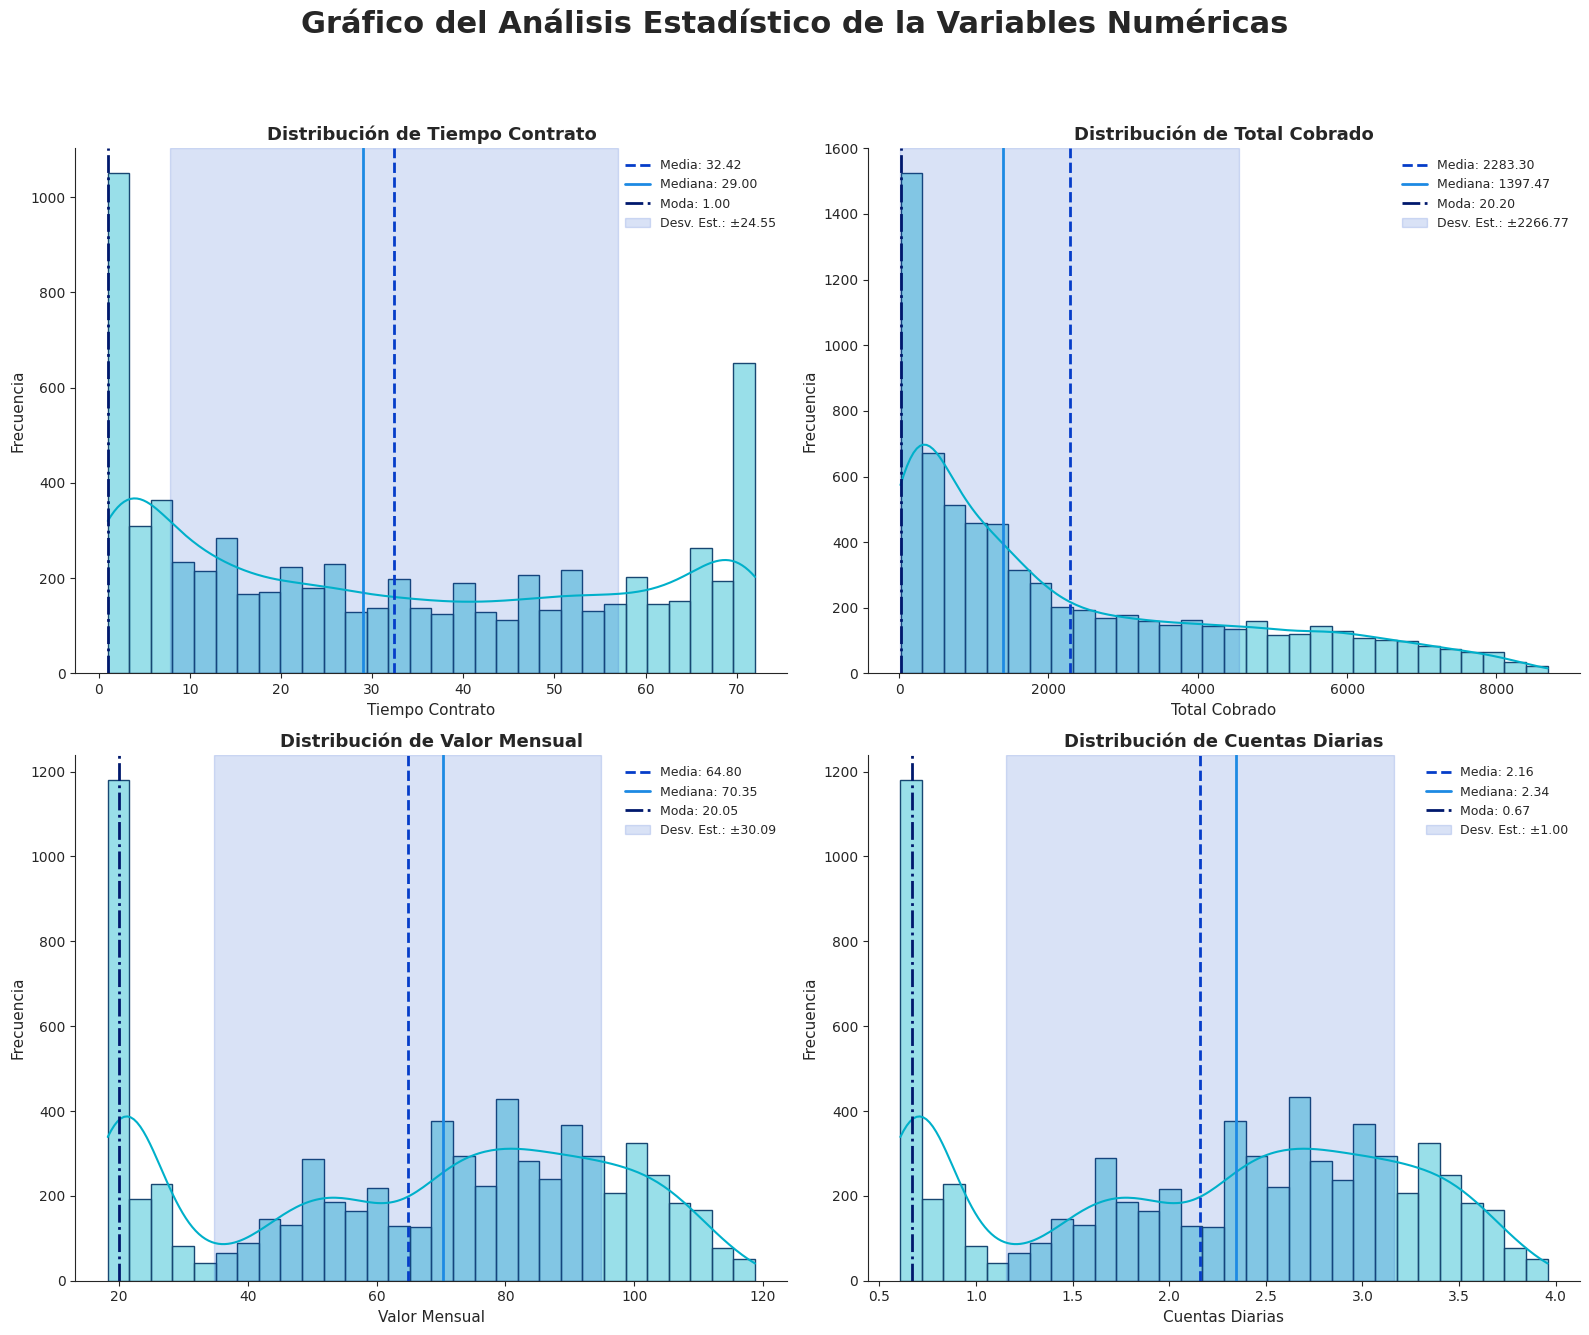

---
>***Insights Clave – Comportamiento de Clientes***
---

>El análisis conjunto de la media, mediana, moda y desviación estándar revela patrones críticos en el comportamiento de los clientes:

>***1. La deserción ocurre temprano:*** El gasto acumulado es bajo para la mayoría de los clientes (media > mediana), lo que indica que pocos clientes antiguos elevan el promedio mientras la mayoría tiene bajo gasto acumulado. Esto confirma que la deserción se concentra en los primeros meses.

>***2. Existe un “valle” en la permanencia:*** Muchos clientes muy nuevos y muchos muy antiguos, pero pocos intermedios (El tiempo de contrato muestra gran variabilidad y posible distribución bimodal). El desafío está en consolidar la relación después del onboarding.

>***3. Alta sensibilidad al precio:*** La mayoría paga planes relativamente altos (mediana > media en valor mensual).Por lo que incrementos de tarifa o mala experiencia pueden disparar la deserción.

>***4. Clientes de bajo costo = baja lealtad:*** El plan más frecuente es el más económico (moda baja). Estos clientes suelen tener baja fidelidad y alta probabilidad de cambiar por pequeñas diferencias de precio.

>***5. El “Mes 1” es crítico:*** La mayor frecuencia ocurre en el primer mes (moda=1.00). El desafío no es atraer clientes, sino retenerlos después de la adquisición.

#### *4.3.3 Distribución de Churn*

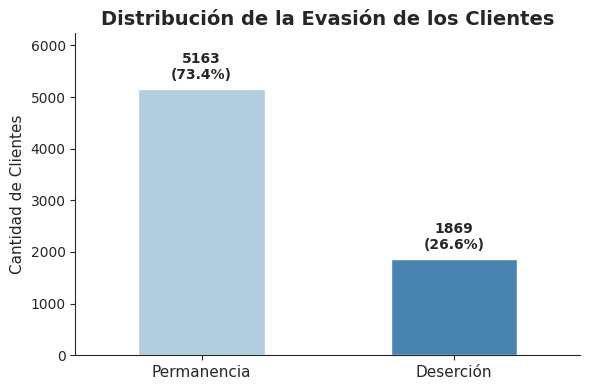

---
>***Distribución de la Evasión – Termómetro del Riesgo***
---

>***1. Tasa de deserción del 26.6%:*** 1 de cada 4 clientes abandona la empresa. Es un nivel elevado para un modelo de suscripción y obliga a captar constantemente nuevos clientes solo para mantener la base actual.

>***2. Base leal significativa (73.4%):*** Existe una mayoría que permanece El desafío estratégico no es solo frenar la fuga de clientes, sino identificar qué hace que ese 73% sea fiel a la empresa y replicarlo.

#### *4.3.4 Variables categóricas y deserción*

##### *4.3.4.1 Recuento de la evasión por variables categóricas*

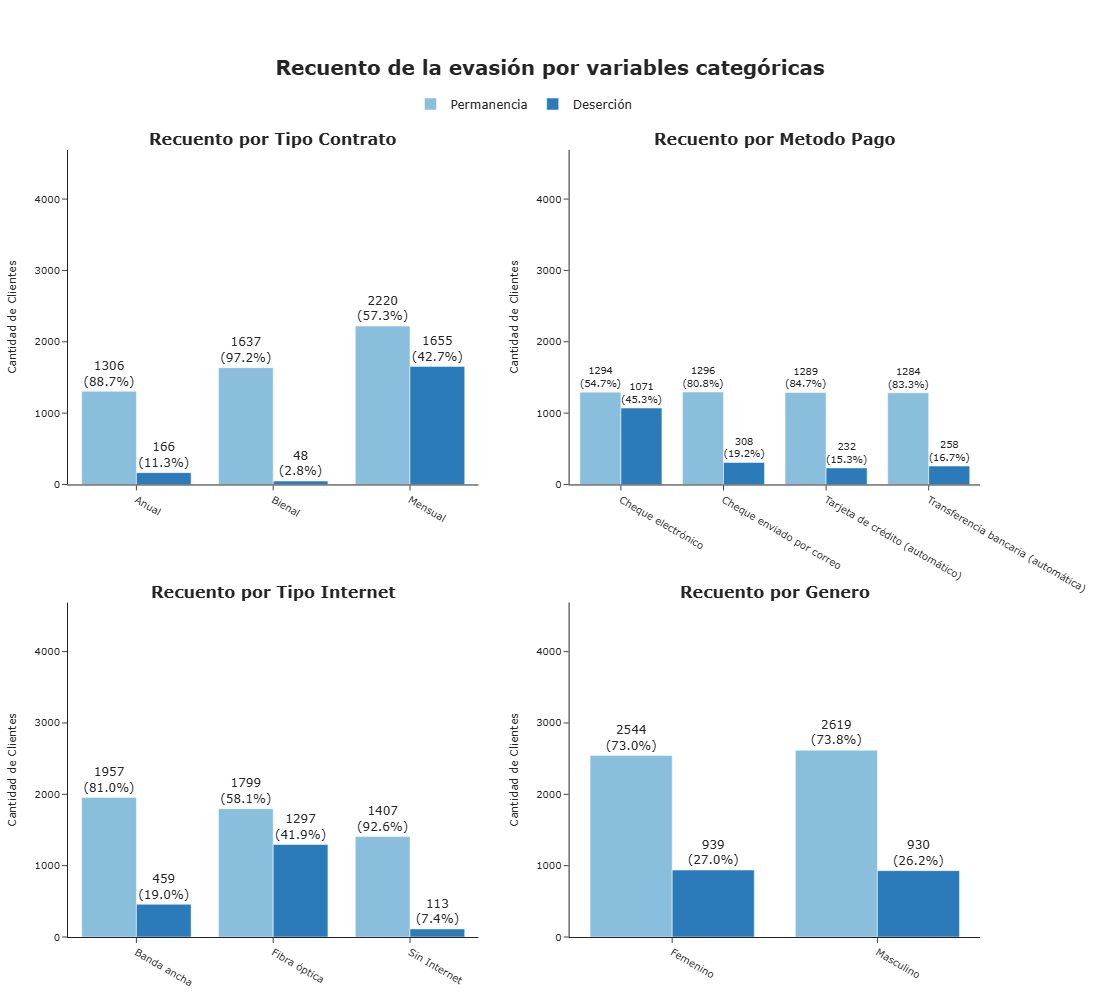

---
>***Deserción por Variables Categóricas – ¿Dónde está el riesgo?***
---

>***1. Contrato mensual = mayor deserción:*** Es el principal predictor de deserción. Los clientes lo perciben como una relación temporal, no como compromiso de largo plazo.

>***2. Clientes de Fibra Óptica desertan más:*** El segmento “premium” muestra mayor insatisfacción. Esto sugiere que el segmento "Premium" de la empresa está insatisfecho, ya sea por una expectativa de velocidad no cumplida o por un precio que no justifica la estabilidad del servicio.

>***3. Cheque electrónico = mayor churn:*** Los clientes que usan cheque electrónico tienen la tasa de deserción más alta. Los pagos no automáticos generan fricción mensual- Cada pago es un momento de decisión para abandonar el servicio.



##### *4.3.4.2 Tasa de Deserción por Perfil y Género*

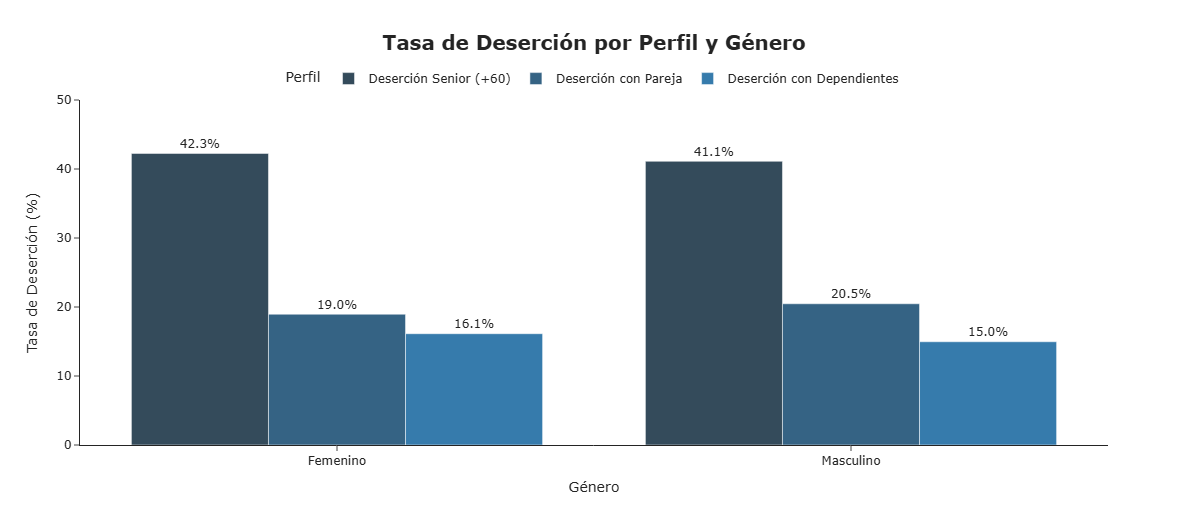

---
>***Tasa de Deserción por Perfil – ¿Quién es el cliente más vulnerable?***
---

>***1. Segmento Senior (+60) = mayor riesgo:*** Supera el 40% de deserción. Es posible que esta tasa de deserción este asociada a falta de soporte humano y complejidad en la experiencia digital.

>***2. Clientes con familia = mayor fidelidad:*** Quienes tienen pareja o dependientes desertan menos. El servicio está “anclado” al hogar, lo que reduce la intención de cambio, ya que ambiar de proveedor es una molestia que afecta a todo el hogar, lo que aumenta la tolerancia a pequeños fallos del servicio.

#### *4.3.5 Variables numéricas y deserción*

##### *4.3.5.1 Recuento de la evasión por variables numéricas*

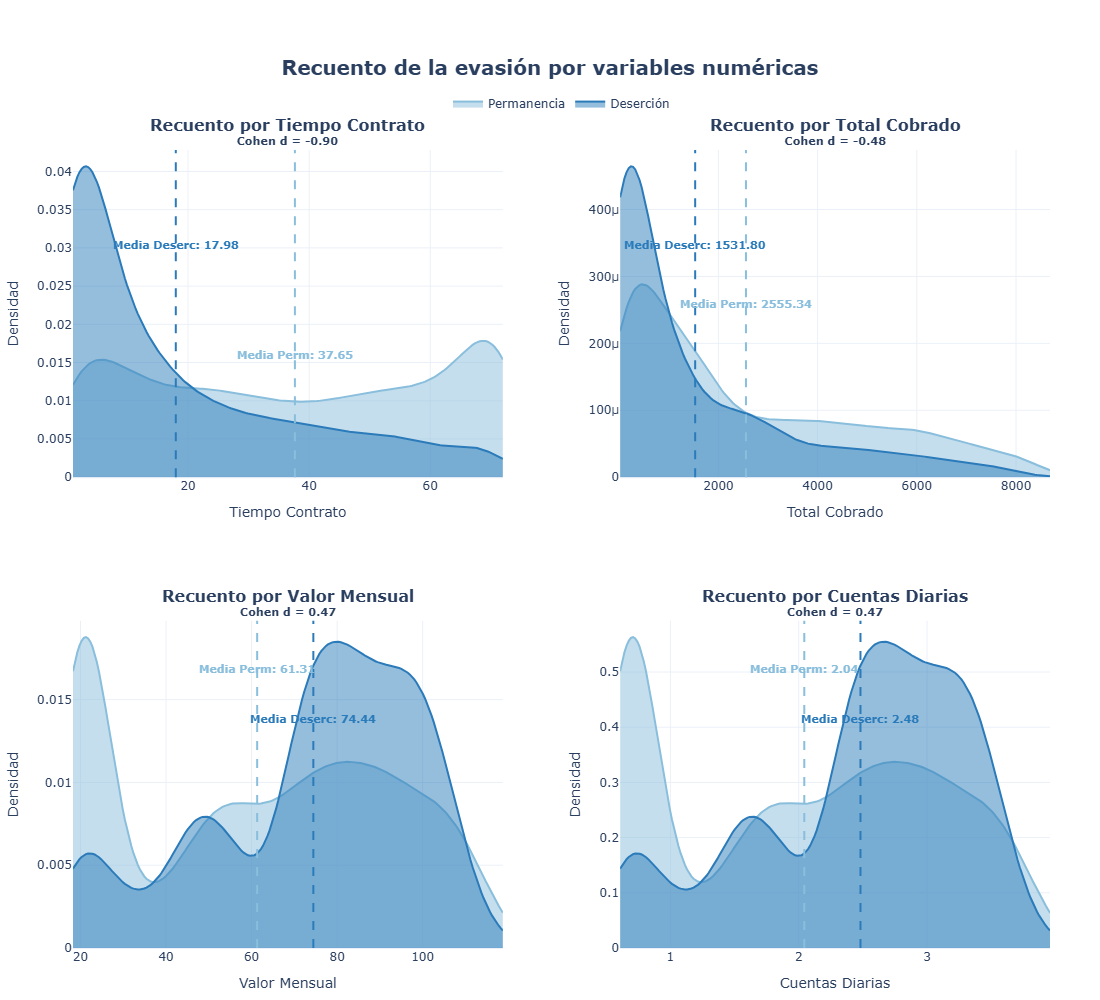

---
>***Deserción por Variables Numéricas – Gasto y Permanencia***
---

>***1. Clientes de mayor facturación desertan más:*** La deserción se concentra en planes de 70 USD-100 USD. No se están yendo los clientes de bajo costo, sino los de mayor ingreso.

>***2. El riesgo es crítico en los primeros meses:*** La curva de deserción cae abruptamente al inicio. Si el cliente no percibe valor en los primeros 6 meses, abandona.

##### *4.3.5.2 Comparativa de Deserción: Ciclo de Vida por Contrato*

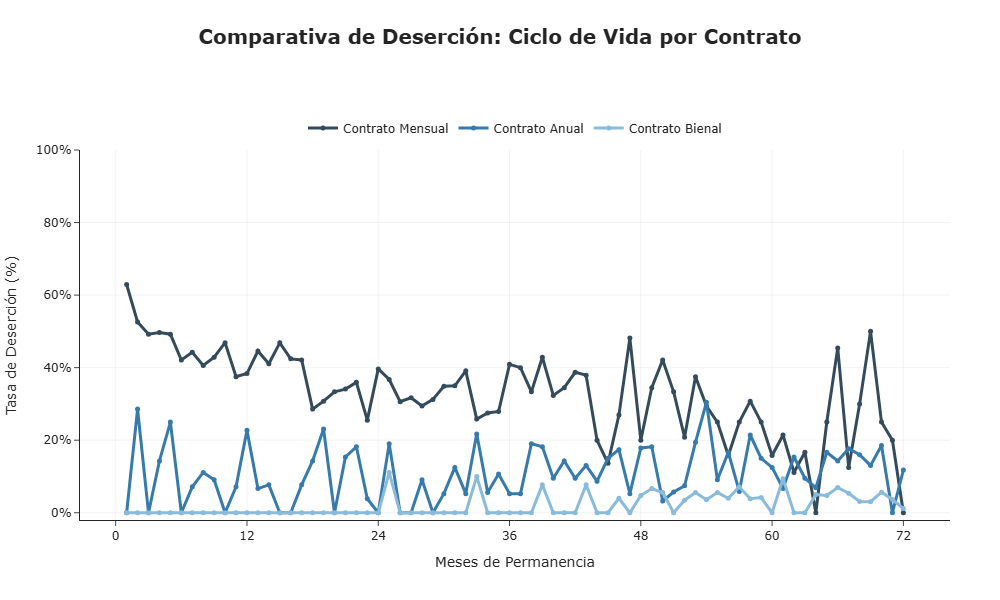

---
>***Deserción según Tipo de Contrato – Ciclo de Vida***
---

>***1. Contrato Mensual = Riesgo Permanente:*** Alta e inestable intención de fuga desde el primer mes. No existe estabilidad; requiere gestión de retención constante.

>***2. Contratos Anual y Bienal = Riesgo en Renovación:*** En los contratos Anuales y Bienales, tienen baja deserción durante la vigencia del contrato. El riesgo aumenta cerca del mes 12 o 24, por lo que la retención debe activarse estratégicamente antes de la renovación.

#### *4.3.6 Análisis de correlación entre variables*

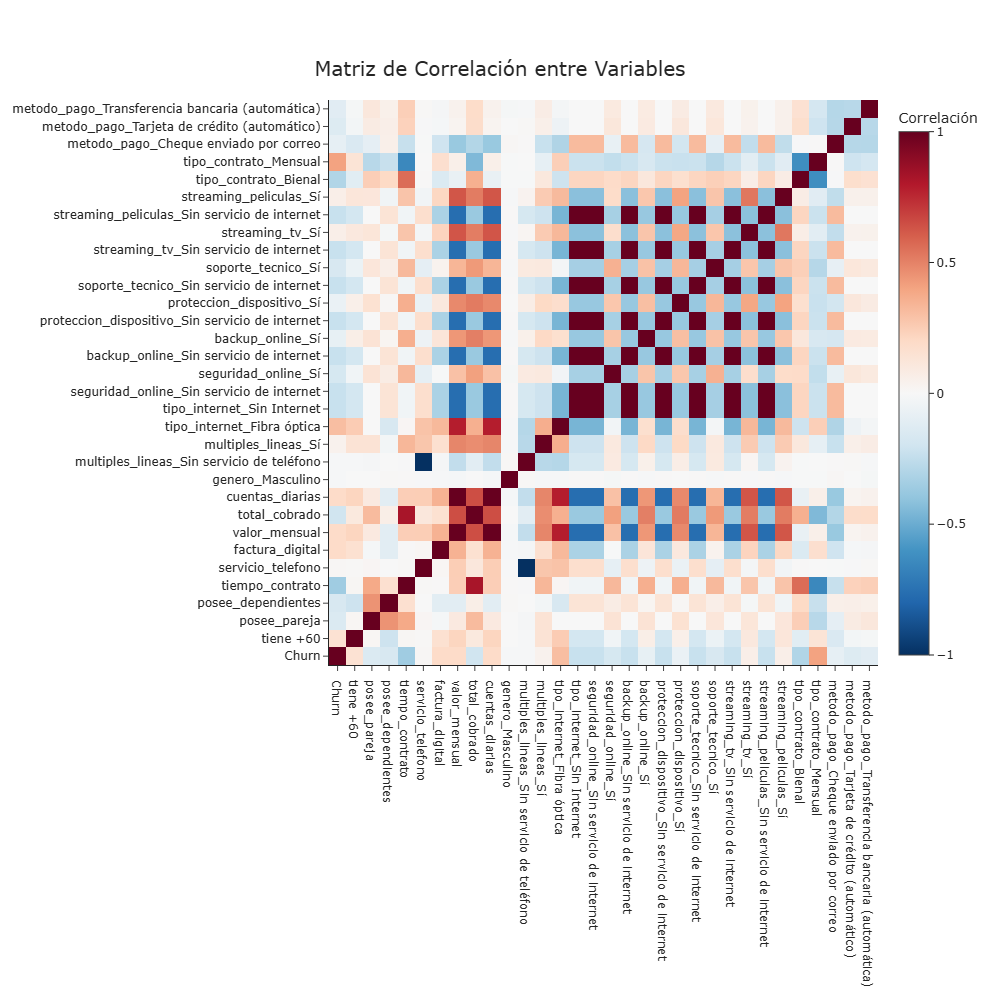

---
>***Análisis de Correlación – Hallazgos Clave***
---

>***1. Permanencia vs. Deserción:*** Existe una fuerte correlación negativa entre tiempo de contrato y deserción. *Mientras más tiempo permanece el cliente, menor es el riesgo de fuga. La retención es el principal escudo contra el churn.*

>***2. Rentabilidad = Retención, no Precio:*** *El total cobrado está altamente ligado al tiempo de permanencia. Los clientes no generan más ingresos por pagar más caro, sino por quedarse más tiempo.* La rentabilidad es un juego de permanencia, no de tarifas altas.

>***3. Servicios de Retención:*** El análisis de correlación muestra que servicios como Soporte Técnico y Seguridad Online no son solo ingresos extra, sino herramientas de fidelización efectivas que "amarran" al cliente a la empresa.

### *4.4 Conclusiones e Insights*



#### *4.4.1 Problema Central*


>- *26.6% de churn anual*
>- *Uno de cada cuatro clientes abandona la empresa.*
>- *El costo de adquisición se diluye rápidamente y compromete la rentabilidad.*

#### *4.4.2 Hallazgos Estratégicos Clave sobre la Deserción:*


>***1. El Contrato Mensual es el Mayor Riesgo:*** Es el principal predictor de deserción. Funciona como una “puerta abierta” a la fuga, mientras que los contratos Anual/Bienal actúan como ancla protectora que reduce la deserción a niveles mínimos.

>***2. El Tiempo es el Mejor Escudo:*** La probabilidad de deserción disminuye a medida que aumenta la antigüedad. Los clientes que logran superar el primer año de servicio muestran una lealtad significativamente mayor, lo que indica que el problema es de onboarding y satisfacción inicial, no de desgaste a largo plazo.

>***3. La Paradoja del Cliente Premium:*** Los clientes de alto ticket (+$70 USD) y servicios premium desertan más. El cliente que más paga es el más exigente y menos tolerante a fallas.

>***4. El Método de Pago Influye:*** Formas de pago no automáticas aumentan el riesgo, ya que generan fricción mensual.

>***5. Servicios Adicionales Reducen la Deserción:*** Soporte técnico y seguridad online no son solo ingresos extra, sino herramientas reales de fidelización.

#### *4.4.3 Perfil del Cliente con Mayor Riesgo de Deserción*


>El cliente más propenso a irse presenta las siguientes características:

>***1. Contrato:*** Modalidad Mes a Mes (es el rasgo más común).

>***2. Antigüedad:*** Muy baja (primer mes o primeros 6 meses)

>***3. Perfil:*** Adulto mayor (Senior +60, que vive solo (sin pareja ni dependientes).

>***4. Pago:*** Cheque electrónico (método manual que obliga a evaluar el gasto cada mes).

>***5. Servicio:*** Fibra óptica con cargo mensual alto (superior a la media de $64.80).

>***6. Extras:*** Sin servicios adicionales de soporte o seguridad. Solo tiene el servicio principal (Internet/Teléfono)

>***Es un cliente nuevo, poco vinculado, de alto pago y sin “anclas” de fidelización.***

### *4.5 Recomendaciones Estratégicas para Reducir la Deserción*



---
>***1. Conversión de Contratos de "Riesgo" a "Seguridad"***
>
>    - ***Insight:*** El Contrato Mensual es el predictor más fuerte de deserción. Genera inestabilidad permanente.
>
>    - ***Acción:*** Campaña de telemarketing dirigida específicamente a clientes con 4 meses de antigüedad en contrato mensual, ofreciéndoles el paso a un Contrato Anual con el beneficio de "Precio Congelado" ante futuras inflaciones.
>
>    - ***Impacto Esperado:*** Mayor estabilidad de ingresos y reducción estructural de la deserción.
---
> ***2. Gestión del "Ciclo de Vida Temprano" (0-6 meses)***
>
>   - ***Insight:*** La mayor fuga ocurre en los primeros 6 meses. Superar los 12 meses aumenta drásticamente la lealtad.
>
>  - ***Acción:*** Implementar un "Bono de Lealtad Semestral". Los clientes con contrato mensual que alcancen el mes 6 recibirán un crédito automático en su factura o una mejora de velocidad sin costo.
>
> - ***Impacto Esperado:*** Superar la deserción de los primeros meses para mover al cliente hacia la zona de permanencia (>12 meses).
---
> ***3. Blindaje del Segmento de Alto Valor (High-Ticket)***
>
> - ***Insight:*** Los clientes de Fibra y alto ticket ($70+) desertan más. El cliente que más paga es el más exigente.
>
> - ***Acción:*** Crear un programa de "Mantenimiento Proactivo" para usuarios de Fibra. Esto incluye auditorías de velocidad remotas cada trimestre y atención prioritaria ("White Glove Service").
>
> - ***Impacto Esperado:*** Protección del segmento que más ingresos genera.
---
> ***4. Inclusión y Soporte para el Segmento Senior (+60)***
>
> - ***Insight:*** Clientes +60 presentan la mayor tasa de deserción.
>
> - ***Acción:*** Lanzar el programa "Telecom Senior". Incluye facturación simplificada (fuera de digital si lo prefieren), soporte telefónico humano inmediato y guías de configuración visuales.
>
> - ***Impacto Esperado:*** Reducción de fricción tecnológica y aumento de satisfacción.
---
> ***5. Incentivo a la Automatización y Digitalización de Pagos***
>
> - ***Insight:*** Métodos manuales (Cheque Electrónico) elevan la deserción.
>
> - ***Acción:*** Ofrecer un descuento recurrente pequeño (2− 5) por migrar a Pago Automático (Tarjeta de Crédito/Débito).
>
> - ***Impacto Esperado;*** Eliminar la evaluación mensual consciente del gasto, convirtiendo el servicio en un gasto pasivo y aumentando la inercia de permanencia.
---

### *4.6 Conclusión final*

---
> - La rentabilidad de Telecom X no depende de subir precios.
Depende de retener más tiempo a los clientes correctos. ***El foco no es adquirir más clientes, el foco es moverlos del Mes 1 al Año 1.***
---
> - La prioridad no es bajar precios, sino aumentar el valor percibido de quedarse. ***Fortalecer el soporte a seniors, incentivar pagos automáticos y proteger los primeros 6 meses, hará que la empresa deje de ser un "comodity" reemplazable para convertirse en un socio esencial del hogar del cliente.***
---